## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.4 MB/s eta 0:00:00


## 데이터 로드

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [6]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [7]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [8]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB




---


## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

심슨의 역설을 설명하기 위해 데이터를 특정 국가로 나누고 각 하위 그룹에서의 총 판매금액의 추세를 분석한다.   
또한, 전체 데이터에 대해서도 동일한 지표를 분석하여 하위 그룹의 추세와 전체 데이터의 추세가 상이한지 확인할 것이다.

### 주어진 국가 그룹 선택

In [10]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
sub_data = df[df['Country'].isin(country_group)]
sub_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


### 상관계수 계산

In [11]:
corr_subdata= sub_data.groupby('Country')['TotalPrice'].corr(sub_data['InvoiceMonth'])
corr_subdata

Country
Canada      -0.048328
Hong Kong    0.024814
Japan        0.107103
Lebanon           NaN
Singapore    0.091665
USA          0.149076
Name: TotalPrice, dtype: float64

### 시각화

<Figure size 1200x600 with 0 Axes>

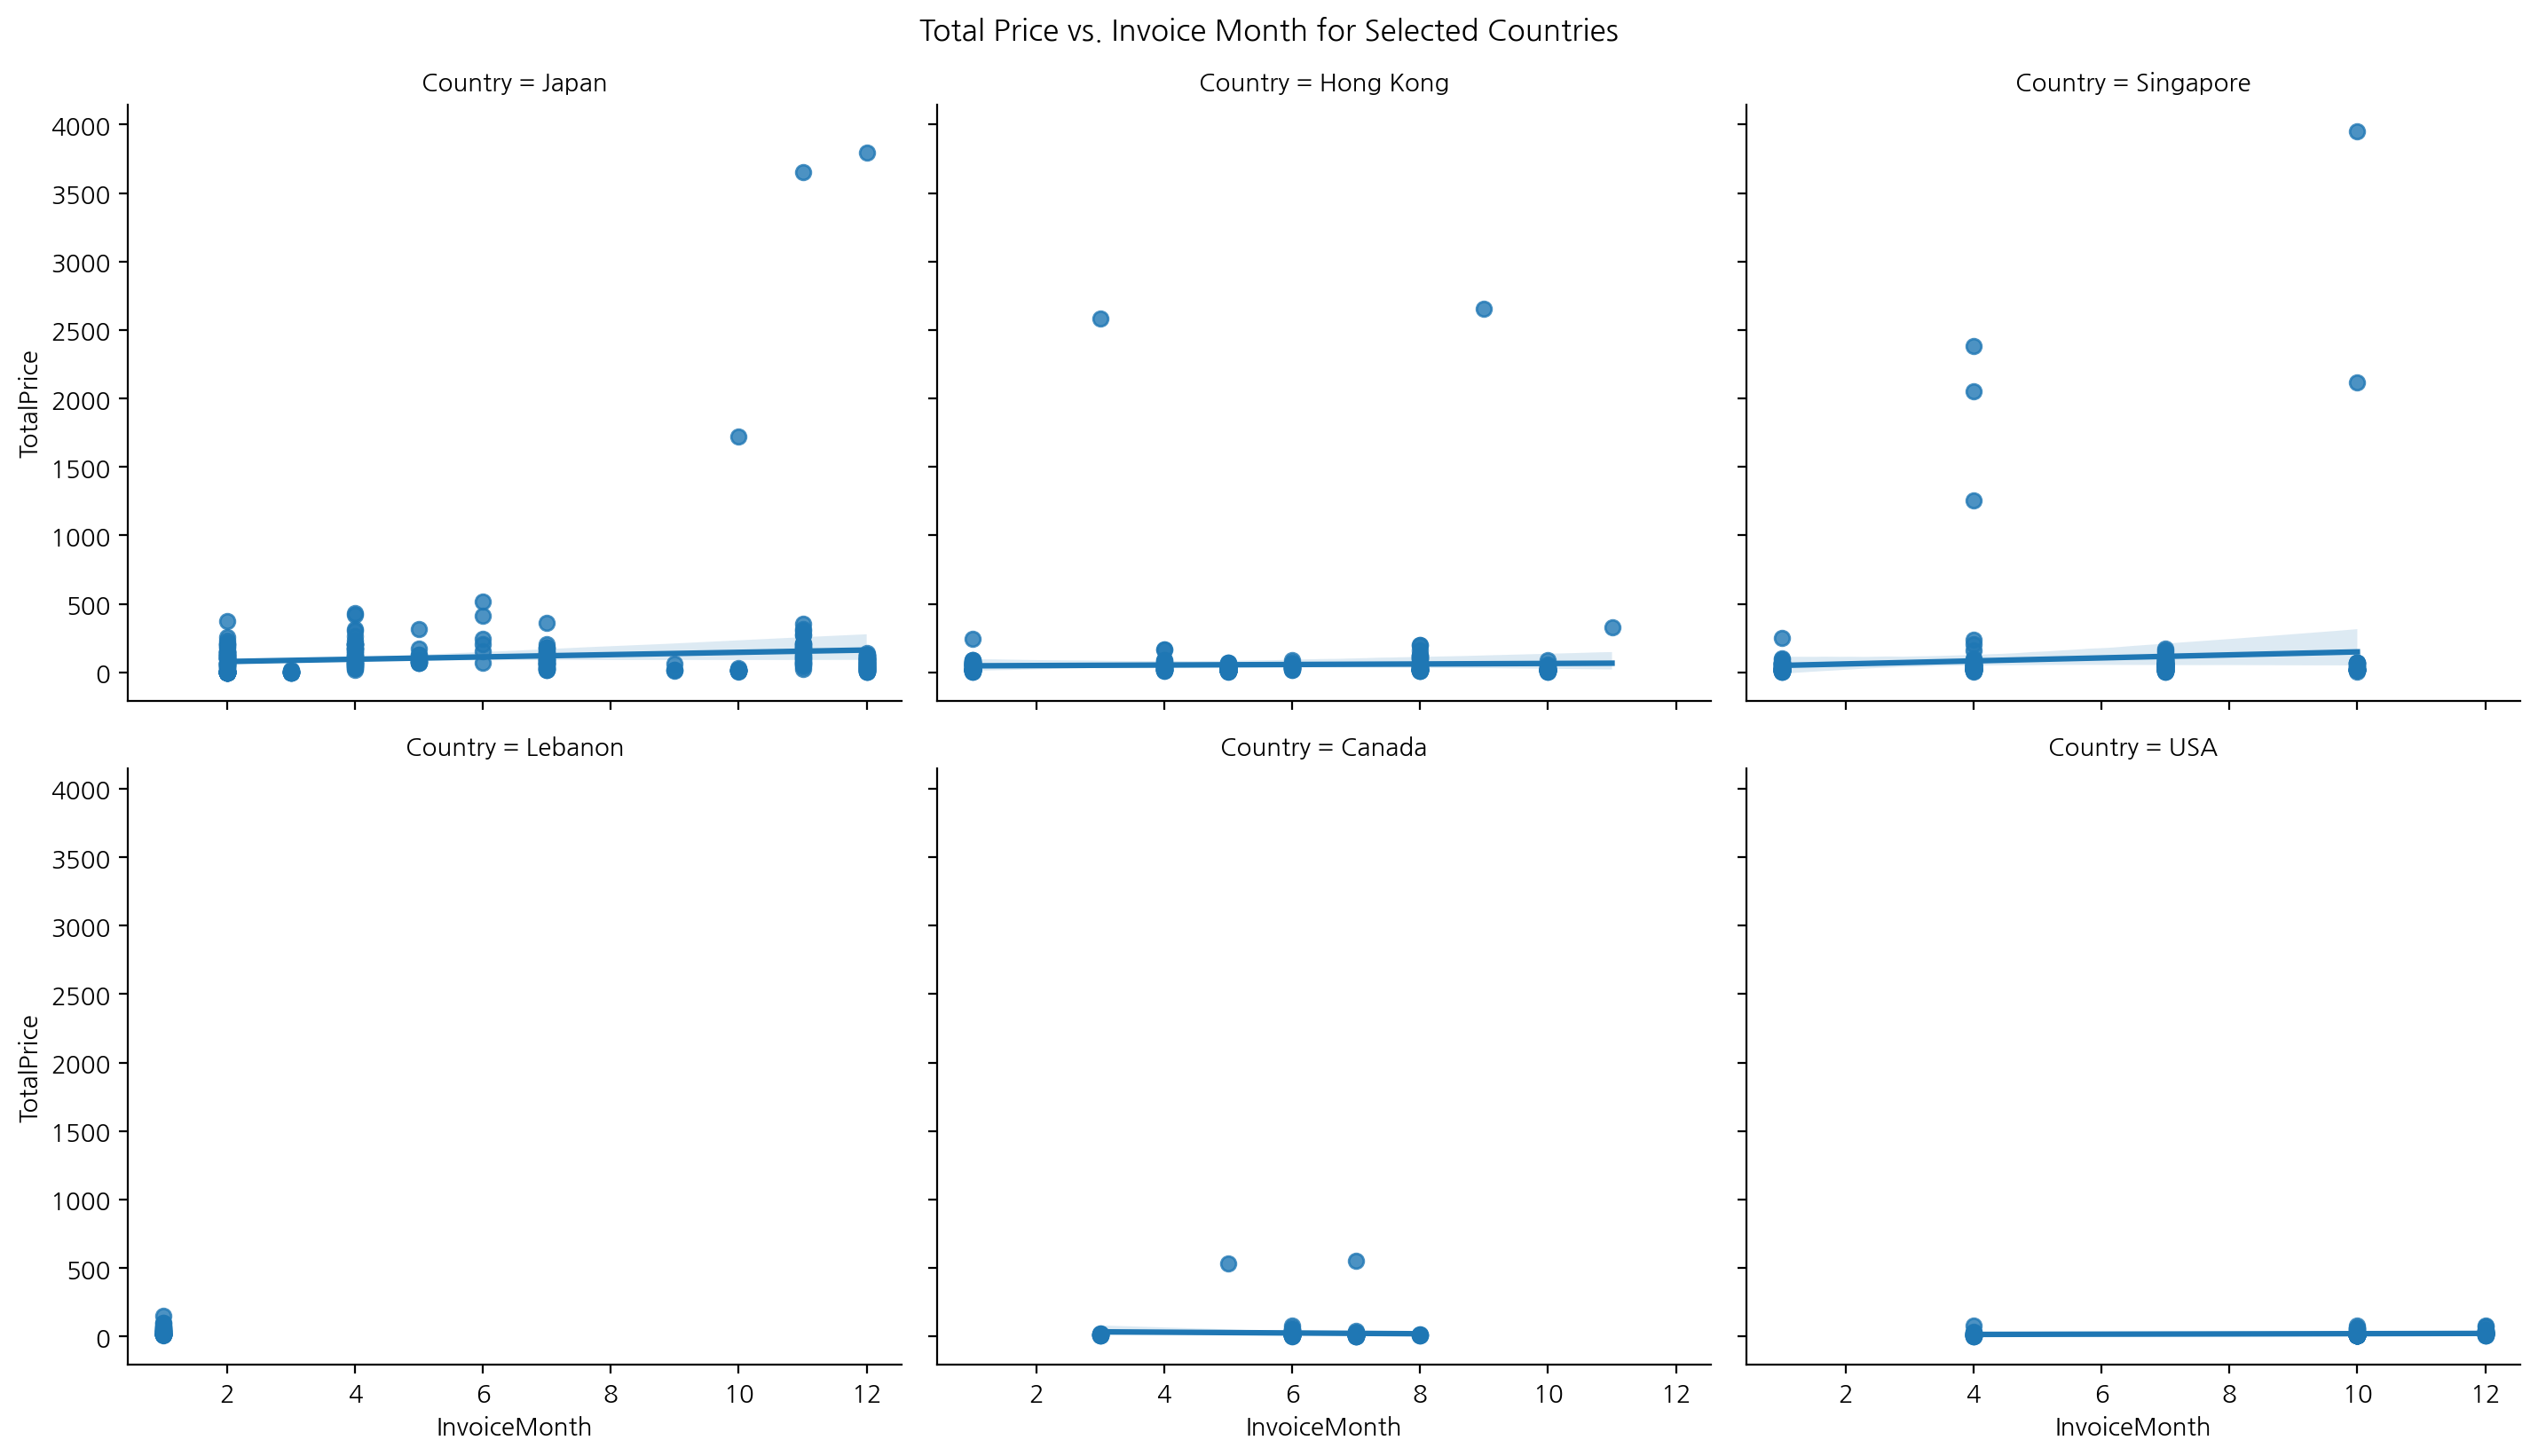

In [13]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='InvoiceMonth', y='TotalPrice', col='Country', col_wrap=3, data=sub_data, height=4, aspect=1.2)
plt.suptitle('Total Price vs. Invoice Month for Selected Countries', y=1.02)
plt.show()

### 전체 데이터에 대한 상관계수 계산

In [14]:
corr_all = df['TotalPrice'].corr(df['InvoiceMonth'])
corr_all

0.00031608497538570743

### 결과 출력

In [15]:
print("Correlation Coefficients for Selected Countries:")
print(corr_subdata)

print("\nCorrelation Coefficient for All Data:")
print(corr_all)

Correlation Coefficients for Selected Countries:
Country
Canada      -0.048328
Hong Kong    0.024814
Japan        0.107103
Lebanon           NaN
Singapore    0.091665
USA          0.149076
Name: TotalPrice, dtype: float64

Correlation Coefficient for All Data:
0.00031608497538570743


### 결과 해석

1. 심슨의 역설
- 상관계수를 통해 나타난 값
  - USA의 상관계수가 0.149076로 가장 크게 나타났다. 이
    - 값이 양수이므로, 미국에서는 Total Price와 Invoice Month 간에 양의 상관관계가 나타난 것이다.
  - 일부 국가에서는 양의 상관관계를 보이지만, 다른 국가에서는 음의 상관관계 또는 거의 0에 가까운 값이 나타나 있다.
    - 이는 국가 간에 판매 동향이 상이하게 나타날 수 있다는 시사점으로 해석될 수 있다.
  - 하지만, 실제로 심슨의 역설을 확인하기 위해서는 전체 데이터와 각 국가별로 세분화된 데이터를 통해 더 심층적인 분석이 필요하다. 또한,Lebanon 국가의 경우 NaN 값이 있어 해당 국가는 분석에서 제외되어야 한다.
- 각 국가의 상품 판매 추세를 시각화
  - 각 국가별 데이터를 보면 총 가격은 청구월이 증가함에 따라 증가하는 추세를 보인다. 하지만 전체 데이터를 합쳐서 보면 총 가격과 청구월 사이에 상관관계가 사라지는 것을 확인할 수 있다.
  - 전체적인 상관 계수가 약한 관련성을 시사하더라도, 개별 국가들을 고려할 때 상관 관계의 방향이 바뀔 수 있다. 이는 국가 간 규모, 크기, 또는 추세의 차이 때문일 수 있다.

2. 비즈니스적 활용
- **마케팅 전략 조정**
  - 특정 국가에서 판매 추세가 다르게 나타날 경우, 해당 국가에 대한 마케팅 전략을 조정하여 효율적으로 상품을 판매할 수 있다.
- **시즌별 할인 및 프로모션**
  - 각 국가의 특정 시기에 따라 판매가 높아질 수 있으므로, 이를 고려하여 시즌별 할인 또는 프로모션을 진행할 수 있다.
- **고객 특성 파악**
  - 각 국가별로 상이한 판매 동향은 고객 특성에 영향을 줄 수 있습니다. 이를 고려하여 국가별로 타겟팅된 마케팅 전략을 수립할 수 있다.
- **재고 관리**
  - 국가 간 판매 동향의 차이를 이용하여 각 국가에 맞게 재고를 조절하고 효율적인 재고 관리를 할 수 있다.



---



## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

### 데이터 전처리
결측치 제거 또는 대체

In [18]:
import statsmodels.api as sm
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


### 단순 회귀분석
독립변수: UnitPrice, 종속변수: TotalPrice

In [20]:
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [21]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:09:03   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.0

### 결과해석

1. 회귀계수 (Coef)
  - const: 상수항, 회귀모델의 절편
    - 회귀계수: 16.0802
  - UnitPrice: 단가에 대한 회귀계수: 1.0343  

**따라서 단가가 증가할수록 총 판매액이 약 1.03배 증가하는 경향을 보인다.**

결정계수 (R-squared)
- 모델이 설명하는 총 변동 중에서 단가가 설명하는 비율: 0.019  

**이는 단순 회귀분석으로는 총 판매액의 변동을 단가만으로 제대로 설명하기 어렵다는 것을 의미한다.**

### 비즈니스적 활용
- 가격 조정 전략
  - 상품의 단가와 총 판매액 간의 양의 관계를 고려하여 가격을 조정할 때, 증가된 단가가 수익을 높일 수 있는 전략을 고려할 수 있다.
- 고급 상품 전략
  - 높은 가격의 고급 상품을 소개하고, 해당 상품이 총 판매액에 양의 영향을 미치는 경우 이를 활용하여 수익을 증대시킬 수 있다.
- 마케팅 및 프로모션
  - 특정 가격대의 상품이 총 판매액에 미치는 영향을 파악하여 마케팅 및 프로모션 전략을 수립할 때 고려할 수 있다.



---


## 미션3) 여러분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

### 프로모션 여부와 시간에 따른 데이터 분리
2011년 이전 데이터만 사용합니다.

In [23]:
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
df_promotion.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False


In [26]:
df_promotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26157 entries, 0 to 42452
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   InvoiceNo           26157 non-null  category      
 1   StockCode           26157 non-null  category      
 2   Description         26157 non-null  category      
 3   Quantity            26157 non-null  int32         
 4   InvoiceDate         26157 non-null  datetime64[ns]
 5   UnitPrice           26157 non-null  float64       
 6   CustomerID          26157 non-null  float32       
 7   Country             26157 non-null  object        
 8   InvoiceMonth        26157 non-null  int64         
 9   TotalPrice          26157 non-null  float64       
 10  IsChristmasPeriod   26157 non-null  bool          
 11  IsChristmasProduct  26157 non-null  bool          
dtypes: bool(2), category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memo

In [60]:
df_promotion['IsChristmasProduct'].value_counts()

False    24556
True      1601
Name: IsChristmasProduct, dtype: int64

In [61]:
df_promotion['IsChristmasPeriod'].value_counts()

False    26157
Name: IsChristmasPeriod, dtype: int64

In [71]:
df_promotion[df_promotion["InvoiceDate"] > "2010-12-25"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct


In [63]:
df_promotion["InvoiceDate"].dtype

dtype('<M8[ns]')

In [64]:
df_promotion[df_promotion["IsChristmasPeriod"]]["InvoiceDate"]

Series([], Name: InvoiceDate, dtype: datetime64[ns])

### 증거의 사다리

귀무가설 (H0): 크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에 차이가 없다.  
대립가설 (H1): 크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에 차이가 있다.

#### 크리스마스 관련 상품과 비관련 상품의 판매량 추출

In [28]:
christmas_sales = df_promotion[df_promotion["IsChristmasProduct"]]["TotalPrice"]
non_christmas_sales = df_promotion[~df_promotion["IsChristmasProduct"]]["TotalPrice"]

print(f'chrismas sales : {christmas_sales}')
print(f'\n non christmas sales : {non_christmas_sales}')

chrismas sales : 46       204.00
122       11.80
172       15.00
197       51.00
211       17.00
          ...  
41265      0.85
41266      0.85
41267      1.70
41312      1.25
41537     12.50
Name: TotalPrice, Length: 1601, dtype: float64

 non christmas sales : 0        15.30
1        20.34
2        22.00
3        20.34
4        20.34
         ...  
42448     1.25
42449     1.69
42450     1.69
42451     9.90
42452     2.50
Name: TotalPrice, Length: 24556, dtype: float64


#### t-검정 수행

In [29]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(christmas_sales, non_christmas_sales, equal_var=False)

print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: -8.71765788319426
P-value: 4.10207471791115e-18


#### 유의수준 0.05에서의 가설 검정

In [30]:
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에 차이가 있습니다.")
else:
    print("귀무가설 채택: 크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에 차이가 없습니다.")

귀무가설 기각: 크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에 차이가 있습니다.


#### 결과 해석

- t-statistic: -8.7177
  - t-statistic: 두 집단 간의 평균 차이를 표현하는 값
  - 이 값이 음수이면 크리스마스 관련 상품의 판매량이 비관련 상품보다 적다는 것을 나타낸다.
  - 그러나 이 값의 크기만으로는 통계적으로 유의미한지 판단하기 어렵다.


- P-value: 4.10e-18 (거의 0에 가까운 값)
  - P-value: 귀무가설이 참일 때, 현재나 더 극단적인 결과가 나올 확률을 의미
    - 이 값이 유의수준(보통 0.05)보다 작으므로 귀무가설을 기각한다.

- 해석
  - 주어진 데이터에서 크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에는 통계적으로 유의미한 차이가 있다.  
  기각된 귀무가설은 "크리스마스 관련 상품과 비관련 상품 간의 평균 판매량에 차이가 없다" 였으므로, 이제는 대립가설을 채택할 수 있다.   
  따라서, 크리스마스 관련 상품과 비관련 상품 간에는 판매량에 차이가 있다.






###  크리스마스 효과 분석

#### 크리스마스 기간 동안 관련 상품 vs. 비관련 상품 판매량 비교

In [33]:
christmas_related = df_promotion[df_promotion["IsChristmasProduct"]]
non_christmas_related = df_promotion[~df_promotion["IsChristmasProduct"]]

print('christmas related')
christmas_related.head()

christmas related


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,12,204.0,False,True
122,536381,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,2010-12-01 09:41:00,2.95,15311.0,United Kingdom,12,11.8,False,True
172,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-01 09:56:00,1.25,17420.0,United Kingdom,12,15.0,False,True
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.0,Australia,12,51.0,False,True
211,536390,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-01 10:19:00,8.50,17511.0,United Kingdom,12,17.0,False,True


In [34]:
print('non christmas related')
non_christmas_related.head()

non christmas related


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False


#### 크리스마스 기간 동안 매출 증가율 분석

In [35]:
sales_increase_rate = (christmas_related["TotalPrice"].sum() - non_christmas_related["TotalPrice"].sum()) / non_christmas_related["TotalPrice"].sum() * 100
sales_increase_rate

-95.57510846651454

#### 크리스마스 효과 크기 및 통계적 유의성 검증

In [36]:
t_statistic, p_value = stats.ttest_ind(christmas_related["TotalPrice"], non_christmas_related["TotalPrice"])

print(f"sales increase rate : {sales_increase_rate:.2f}%")
print(f"t-statistic : {t_statistic}")
print(f"p_value : {p_value}")

sales increase rate : -95.58%
t-statistic : -3.630938334937739
p_value : 0.00028293167024236903


#### 해석
크리스마스 관련 상품과 비관련 상품 간의 판매량은 크리스마스 기간 동안 큰 차이를 보이며, 크리스마스 관련 상품의 매출은 크게 감소한 것으로 확인된다.  
통계적 검증 결과, 이 차이는 통계적으로 유의미하다는 것을 나타낸다. 이 정보를 토대로 크리스마스 시즌에 적절한 전략을 수립하는 데 활용할 수 있다.



---


## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

### 다변량 회귀분석

In [39]:
import statsmodels.formula.api as smf

In [41]:
model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_promotion).fit()
model

In [42]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.46e-138
Time:                        03:15:32   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### 해석

R-squared (결정 계수)
- 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표로, 0.027로 상대적으로 낮다.
- 즉, 모델이 종속 변수의 변동성을 일부만 설명한다는 것을 의미한다.


계수 해석
- Intercept (절편): 16.8705
  - 이 값은 모든 독립 변수가 0일 때 종속 변수의 값
- IsChristmasProduct[T.True]: -0.7779
  - 크리스마스 관련 상품 여부가 판매량에 미치는 영향을 나타낸다.
  - 이 값이 음수이므로 크리스마스 관련 상품은 평균적으로 판매량이 감소하는 경향이 있다.
- UnitPrice: -0.5510
  - 단가가 증가할수록 판매량이 감소하는 경향이 있다.
- Country의 여러 계수
  - 국가에 따라 판매량에 차이가 있음을 나타낸다.
  - 예를 들어, Country[T.Netherlands]의 계수는 78.9641로, 네덜란드에서는 평균적으로 다른 국가에 비해 높은 판매량을 보여준다.

통계적 유의성

- P-value
  - 각 독립 변수에 대한 P-value는 해당 독립 변수가 종속 변수에 미치는 영향이 통계적으로 유의미한지를 판단한다.
  - 작은 P-value는 해당 계수가 통계적으로 유의미하다는 것을 나타낸다.


모델의 유의성
- F-statistic: 31.87,
  - 모델 전체의 유의성을 나타내는 통계량
  - 작은 P-value (5.46e-138)은 적어도 하나의 독립 변수가 종속 변수에 유의미한 영향을 미친다는 것을 나타낸다.

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

### 타겟 변수 생성

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

### 특성과 타겟 변수 분리

In [45]:
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']

In [56]:
X

,UnitPrice,Quantity,CustomerID,Country_Australia,Country_Austria,Country_Belgium,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,...,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Singapore,Country_Spain,Country_Switzerland,Country_United Kingdom,Country_Unspecified
0,2.55,6,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4.25,6,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49,2.55,6,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64,4.25,6,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66,2.55,6,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541639,2.95,1,14446.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
541711,0.55,144,16626.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
541732,0.85,1,15311.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
541876,0.85,24,15804.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
y

0          True
6         False
49         True
64        False
66         True
          ...  
541639    False
541711    False
541732    False
541876    False
541888    False
Name: Target, Length: 8748, dtype: bool

### 데이터 분할

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'X train: {X_train.shape}')
print(f'y train: {y_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y test: {y_test.shape}')

X train: (6998, 27)
y train: (6998,)
X test: (1750, 27)
y test: (1750,)


### 로지스틱 회귀 모델 생성 및 학습

In [47]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 모델 평가

In [50]:
y_pred = model.predict(X_test)
print(y_pred)

[ True False False ... False False False]


### 혼동 행렬 출력

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1244  109]
 [ 357   40]]


<Axes: >

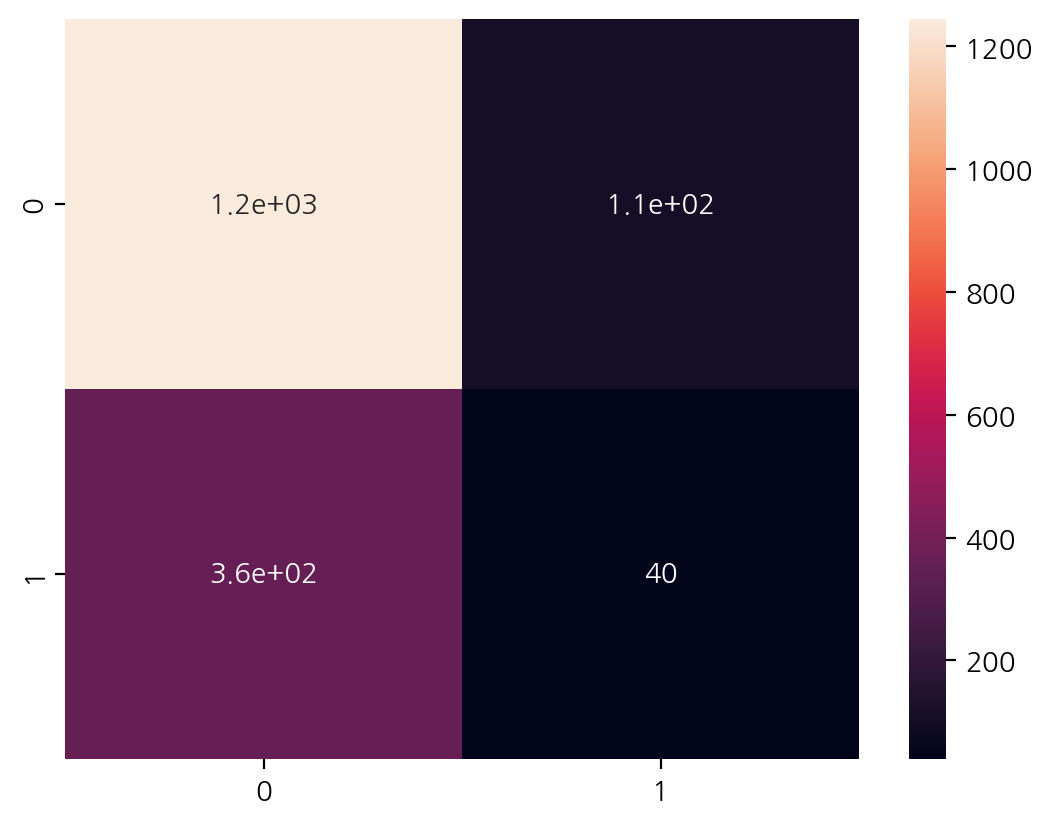

In [54]:
sns.heatmap(conf_matrix, annot=True)

True Negative (TN): 실제 False인데 모델이 False로 예측한 경우, 1244건
False Positive (FP): 실제 False인데 모델이 True로 예측한 경우, 109건
False Negative (FN): 실제 True인데 모델이 False로 예측한 경우, 357건
True Positive (TP): 실제 True인데 모델이 True로 예측한 경우, 40건

</br>

정확한 예측: TN + TP = 1244 + 40 = 1284건  
모델이 False로 예측한 경우: FP + FN = 109 + 357 = 466건

### 분류 보고서 출력

In [55]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.92      0.84      1353
        True       0.27      0.10      0.15       397

    accuracy                           0.73      1750
   macro avg       0.52      0.51      0.49      1750
weighted avg       0.66      0.73      0.68      1750



- 모델의 성능은 정밀도와 재현율이 조화롭게 증가한다. 그러나 이 모델은 True에 대한 예측이 낮아 재현율이 낮게 나타나고 있다.
- 정확도가 73%로 나타나지만, 클래스 간 데이터 불균형이 있을 때 정확도만으로 성능을 판단하는 것은 부족하다.






### 회고

아직까지 모르는게 많아서 시간이 걸렸다.
크리스마스 미션에서 시간이 문제 자체를 이해하는데도 오래 걸리고 뭔가 이상하다는 건 알고 있었는데 시간이 부족해서 못할 거 같아 그냥 일단은 해둔대로 냅뒀다..  
음,,할 수 있는 건 다한 거 같은데 잘 모르겠다..~~  